<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект. Если ты дошел до данного анализа, то ты уже проделал большую работу над проектом в тренажере. Давай завершим исследование посредством инструментов Python. Будет здорово, если ты, надеюсь, не против, если я буду на ты,  будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Аналитика средствами Python

**Описание проекта:** исследуем результаты запросов количества рейсов с вылетом в сентябре 2018 года на каждой модели самолёта и среднего количества прибывающих рейсов в день для каждого города за август 2018 года:
- импортируем файлы;
- изучим данные в них;
- проверим типы данных на корректность;
- выберем топ-10 городов по количеству рейсов;
- построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделаем выводы по каждому из графиков, поясним результат.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Хорошо бы также описать те данные, с которыми мы работаем. 
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display
from scipy import stats as st
import requests
import re
from bs4 import BeautifulSoup

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

Загрузим в переменную *aircrafts_flights_amount* информацию о количестве рейсов *flights_amount* для каждой модели самолетов *model* в сентябре 2018 года и выведем на экран.

In [2]:
aircrafts_flights_amount = pd.read_csv('/datasets/query_1.csv')
aircrafts_flights_amount

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Изучим данные методом `info()`.

In [3]:
aircrafts_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Дататасет состоит из 2 столбцов и 8 строк. Названия столбцов не требуют изменений. Нулевые значения отсутствуют. Типы данных корректны.

Загрузим в переменную *city_average_flights* информацию о среднем количестве рейсов, прибывающих в город *city* за день в августе 2018 года и выведем на экран.

In [4]:
city_average_flights = pd.read_csv('/datasets/query_3.csv')
city_average_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Изучим данные методом `info()`.

In [5]:
city_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Дататасет состоит из 2 столбцов и 101 строки. Названия столбцов не требуют изменений. Нулевые значения отсутствуют. Типы данных корректны.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Первый взгляд на таблицы выполнен. В этот раз с ними все хорошо, предобработка не требуется. Раз уж с ними все так хорошо, то предлагаю их несколько оптимизировать. Видим, что в `average_fligts` довольно небольшие вещественные цисла. Можно поменять формат для этого поля с `float64` на, например `float16`. Данное действие позволит нам уменьшить объем занимаемой памяти в 4 раза для данного параметра. 

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Изменим формат поля `average_flights` с `float64` на `float16`.

</div>

In [6]:
city_average_flights['average_flights'] = city_average_flights['average_flights'].astype(np.float16())

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

На большем объеме данных данное действие поможет значительно сократить используемые ресурсы. 

</div>

## Выберем топ-10 городов по количеству рейсов

In [7]:
city_average_flights.sort_values(by='average_flights', ascending=False)['city'].head(10)

43             Москва
70    Санкт-Петербург
54        Новосибирск
33         Красноярск
20       Екатеринбург
67     Ростов-на-Дону
63              Пермь
10             Брянск
74               Сочи
84          Ульяновск
Name: city, dtype: object

**Вывод:** больше всего рейсов ожидаемо в Москве и Петербурге. Также в топе: Новосибирск, Красноярск, Ульяновск (Сибирь); Екатеринбург, Пермь (Урал); Ростов-на-Дону, Сочи (Юг), Брянск (Западная часть России).

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Очень не хватает графика в данном месте проекта. Он есть ниже, но по логике должен быть в данном месте работы.   

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Продублируем график топ-10 городов и количество рейсов.

</div>

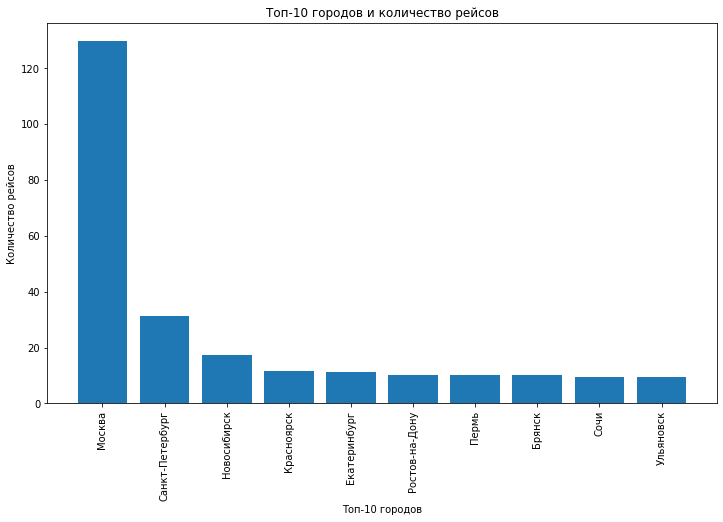

In [8]:
plt.figure(figsize=(12, 7))
plt.bar(city_average_flights.sort_values(by='average_flights', ascending=False)['city'].head(10), \
        city_average_flights.sort_values(by='average_flights', ascending=False)['average_flights'].head(10))
ax = plt.gca()
ax.set_xlabel('Топ-10 городов')
ax.set_ylabel('Количество рейсов')
ax.set_xticklabels(city_average_flights.sort_values(by='average_flights', ascending=False)['city'].head(10), \
                   rotation = 90, verticalalignment = 'top')
plt.title('Топ-10 городов и количество рейсов');

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Тут он в самый раз) 

</div>

## Построим график модели самолетов и количества рейсов

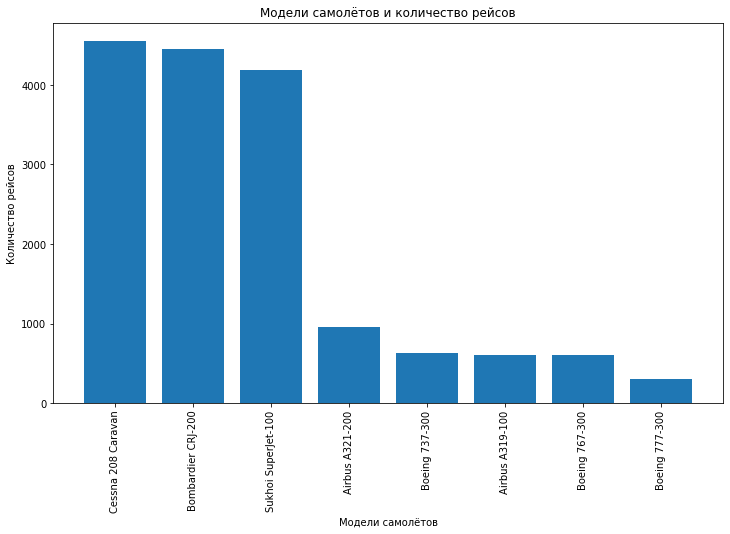

In [9]:
plt.figure(figsize=(12, 7))
plt.bar(
    aircrafts_flights_amount.sort_values(by='flights_amount', ascending=False)['model'], \
    aircrafts_flights_amount.sort_values(by='flights_amount', ascending=False)['flights_amount']
)
ax = plt.gca()
ax.set_xlabel('Модели самолётов')
ax.set_ylabel('Количество рейсов')
ax.set_xticklabels(aircrafts_flights_amount.sort_values(by='flights_amount', ascending=False)['model'], \
                   rotation = 90, verticalalignment = 'top')
plt.title('Модели самолётов и количество рейсов');

Сгруппируем модели *Airbus* и *Boeing*. Для этого создадим столбец *grouped*, куда в цикле запишем значение *Airbus* для самолётов Airbus, *Boeing* — для самолётов Boeing и содержимое столбца *model* для остальных. Выведем таблицу на экран.

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Попробуй детальнее разобраться в том, почему мы получаем такие результаты. Старайся вводить аналитику в выводы. 

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

**Вывод:** в России региональные самолёты компаний Bombardier, Cessna, Sukhoi популярнее самолётов крупнейших авиакомпаний Boeing и Airbus.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ок, за счет чего?

</div>

In [10]:
for i in range(aircrafts_flights_amount.shape[0]):
    if "Airbus" in aircrafts_flights_amount.loc[i, 'model']:
        aircrafts_flights_amount.loc[i, 'grouped'] = "Airbus"
    elif "Boeing" in aircrafts_flights_amount.loc[i, 'model']:
        aircrafts_flights_amount.loc[i, 'grouped'] = "Boeing"
    else:
        aircrafts_flights_amount.loc[i, 'grouped'] = aircrafts_flights_amount.loc[i, 'model']

In [11]:
aircrafts_flights_amount

,model,flights_amount,grouped
0,Airbus A319-100,607,Airbus
1,Airbus A321-200,960,Airbus
2,Boeing 737-300,630,Boeing
3,Boeing 767-300,600,Boeing
4,Boeing 777-300,300,Boeing
5,Bombardier CRJ-200,4446,Bombardier CRJ-200
6,Cessna 208 Caravan,4557,Cessna 208 Caravan
7,Sukhoi SuperJet-100,4185,Sukhoi SuperJet-100


Построим график.

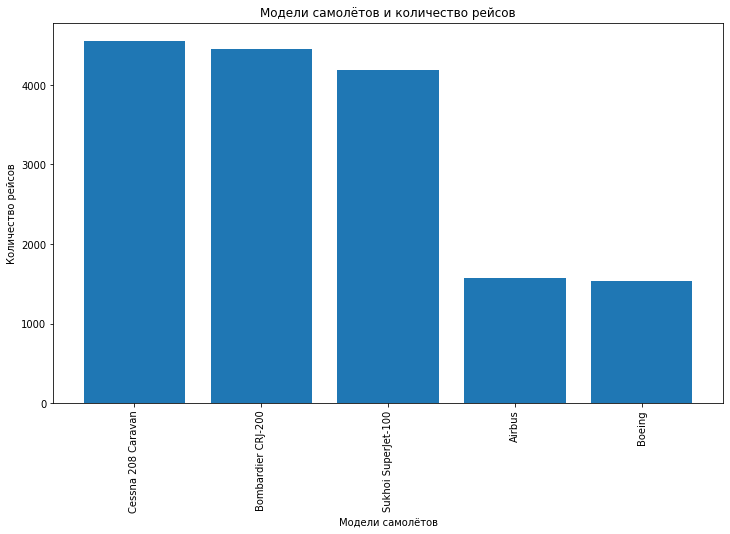

In [12]:
plt.figure(figsize=(12, 7))
plt.bar(
    aircrafts_flights_amount.groupby('grouped').sum().sort_values(by='flights_amount', ascending=False).index, \
    aircrafts_flights_amount.groupby('grouped').sum().sort_values(by='flights_amount', ascending=False)['flights_amount']
)
ax = plt.gca()
ax.set_xlabel('Модели самолётов')
ax.set_ylabel('Количество рейсов')
ax.set_xticklabels(
    aircrafts_flights_amount.groupby('grouped').sum().sort_values(by='flights_amount', ascending=False).index, \
    rotation = 90, verticalalignment = 'top'
)
plt.title('Модели самолётов и количество рейсов');

**Вывод:** самыми популярными моделями внутренних авиаперевозок являются Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100. Суммарное присутствие Airbus и Boeing значительно меньше.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

А зачем нам такая частичная группировка по производителю? Что ты хотел с ее помощью получить?

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Подтвердить вывод о том, что Boeing и Airbus менее популярны в России.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

В принципе, мы это и так видим выше. Радует то, что ты так спокойно оперируешь категоризацией и построением графиков. Это важные навыки. 

</div>

## Построим график городов и количества рейсов

Сохраним количество рейсов в переменную *city_average_flights_amount*.

In [13]:
city_average_flights_amount = city_average_flights.sort_values(by='average_flights', ascending=False)['average_flights']

Упорядочим индексы.

In [14]:
city_average_flights_amount.index = range(city_average_flights.shape[0])

И построим график.

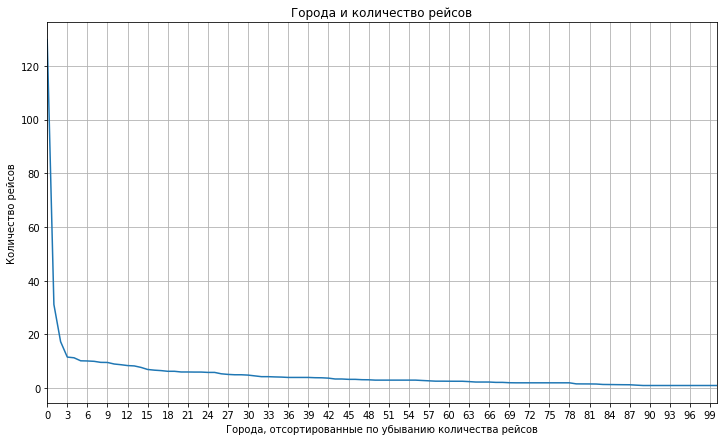

In [15]:
plt.figure(figsize=(12, 7))
city_average_flights_amount.plot()
plt.grid(True)
ax = plt.gca()
ax.set_xlabel('Города, отсортированные по убыванию количества рейсов')
ax.set_ylabel('Количество рейсов')
plt.xticks(np.arange(0,101,3))
plt.title('Города и количество рейсов');

**Вывод:** число рейсов по городам распределено неравномерно. Количество перелётов в первых четырёх городах значительно выше, чем в остальных.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

График называется "города и число рейсов". Городов не видно, есть только их номер. Попробуй добавить названия городов. Также лучше изменить тип графиков. Все же мы работаем с категориальными данными, поэтому лучше использовать диаграмму. 

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Добавил график, однако надписи нечитаемы, а график малоинформативен. Требуется категоризация городов, например, по численности населения.

</div>

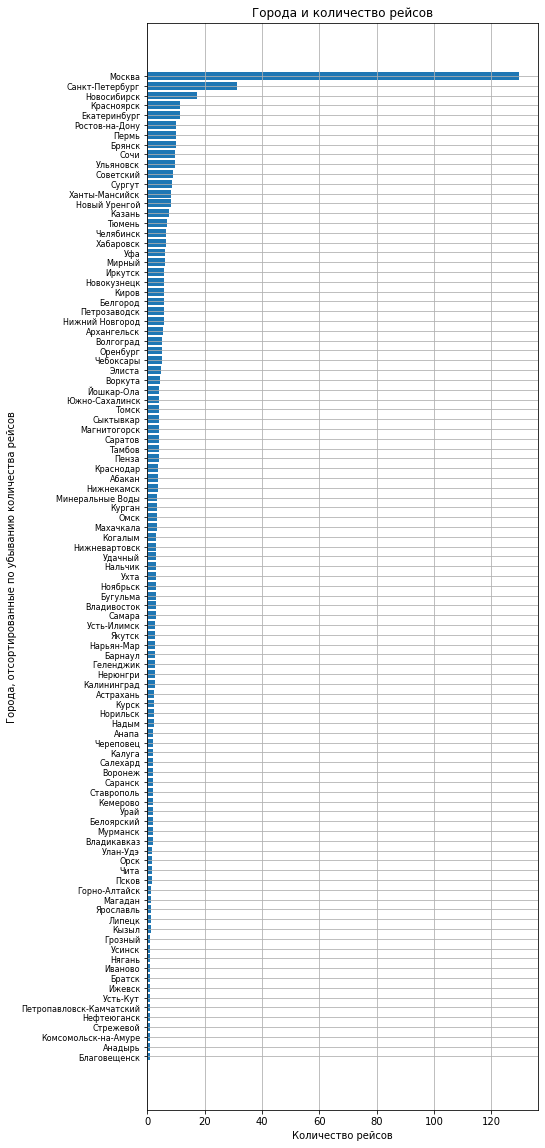

In [16]:
plt.figure(figsize=(7, 20))
plt.barh(city_average_flights.sort_values(by='average_flights')['city'], \
         city_average_flights.sort_values(by='average_flights')['average_flights'])
ax = plt.gca()
plt.grid(True)
ax.set_xlabel('Количество рейсов')
ax.set_ylabel('Города, отсортированные по убыванию количества рейсов')
plt.yticks(fontsize=8)
plt.title('Города и количество рейсов');

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Это именно тот график, что и требовался. Ты сделал верный вывод из него, следует сократить число рассматриваемых городов. 

</div>

Добавим численность населения городов для для поиска взаимосвязи между ним и числом рейсов. Напишем парсер для сбора данных с Википедии, страница *Список городов России с населением более 100 тысяч жителей*. Найдём таблицу *Города России с населением свыше 100 тысяч жителей* и сохраним в таблицу *table*.

In [17]:
URL = 'https://ru.wikipedia.org/wiki/Список_городов_России_с_населением_более_100_тысяч_жителей'
req = requests.get(URL)

soup = BeautifulSoup(req.text, 'lxml')

table = soup.find('table', attrs = {'class':'wikitable sortable'})

Вытащим данные из таблицы.

In [18]:
content=[] # Список, в котором будут храниться данные из таблицы
for row in table.find_all('tr'): 
# Каждая строка обрамляется тегом tr, необходимо пробежаться в цикле по всем строкам
    if not row.find_all('th'): 
# Эта проверка необходима, чтобы пропустить первую строку таблицы с заголовками
            content.append([element.text for element in row.find_all('td')])

Создадим датафрейм *cities_population*, содержащий данные о численности населения городов по годам, и выведем на экран

In [19]:
cities_population = pd.DataFrame(content) 
cities_population

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1\n,2,Москва[17],1039,2080,4609,6133,7194,8057,8878,...,11541,11613,11980,12108,12198,12330,12381,12506,12615,12678\n
1,2\n,1,Санкт-Петербург,1265,1737,3431,3390,4033,4569,4989,...,4899,4953,5028,5132,5192,5226,5282,5352,5384,5398\n
2,3\n,,Новосибирск,8,120,404,885,1161,1309,1420,...,1475,1499,1524,1548,1567,1584,1603,1613,1618,1626\n
3,4\n,35,Екатеринбург,43,140,423,779,1025,1210,1296,...,1353,1378,1396,1412,1428,1444,1456,1469,1483,1494\n
4,5\n,4,Казань,130,179,406,667,869,989,1085,...,1145,1161,1176,1191,1206,1217,1232,1244,1252,1257\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169\n,,Ханты-Мансийск,—,—,7,21,25,28,34,...,81,85,91,93,95,97,99,98,99,101\n
169,170\n,,Новокуйбышевск,—,—,—,63,104,111,113,...,108,108,107,106,105,104,103,102,101,100\n
170,171\n,,Железногорск,—,—,—,—,31,65,85,...,95,96,97,98,99,100,101,101,100,100\n
171,172\n,61,Сергиев Посад,25,21,45,74,92,108,115,...,111,110,108,107,106,105,105,103,102,100\n


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

А это уже круто. Молодец, что привел это, хотя заказчик и не просил об этом)

</div>

В цикле сравним названия городов из результатов запроса *city_average_flights* и сформированного датафрейма *cities_population*. При обнаружении совпадения записываем результат за 2020 год в столбец *population* таблицы *city_average_flights*.

In [20]:
for i in range(city_average_flights.shape[0]):
    for j in range(cities_population.shape[0]):
        if city_average_flights.loc[i, 'city'] in cities_population.loc[j, 2]:
            city_average_flights.loc[i, 'population'] = cities_population.loc[j, 21]

Удалим спецсимволы *\n* методом `replace()`.

In [21]:
city_average_flights['population'] = city_average_flights['population'].str.replace('\n','')

Значения *NaN* указывают на то, что в городах проживает менее 100 тыс. жителей. Заменим пустые значения на 50.

In [22]:
city_average_flights['population'] = city_average_flights['population'].fillna(50)

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Следует ли заполнять пропуски? Что это нам даст?

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Это необходимо для определения группы *малые города*.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ок. Тогда стоит выставить значение не 50, а <100. 

</div>

Изменим тип данных столбца *population* на вещественный методом `astype()`.

In [23]:
city_average_flights['population'] = city_average_flights['population'].astype(float)

Разобьём города на категории в зависимости от численности населения при помощи функции `cut()` и запишем результат в столбец *category*.

In [24]:
city_average_flights['category'] = pd.cut(city_average_flights['population'], [0, 100, 250, 500, 1000, 5000, 15000], \
       labels=['малые города', 'от 100 тыс. до 250 тыс.', 'от 250 тыс. до 500 тыс.', 'от 500 тыс. до 1 млн.', \
               'миллионники', 'Москва и Санкт-Петербург'])

Сгруппируем таблицу *city_average_flights* по категориям и выведем результат на экран.

In [25]:
city_average_flights.groupby('category').sum()

,average_flights,population
category,,
малые города,64.3125,1200.0
от 100 тыс. до 250 тыс.,55.3125,3283.0
от 250 тыс. до 500 тыс.,94.5625,9096.0
от 500 тыс. до 1 млн.,79.2500,11876.0
миллионники,100.5625,15621.0
Москва и Санкт-Петербург,160.8750,18076.0


И построим график.

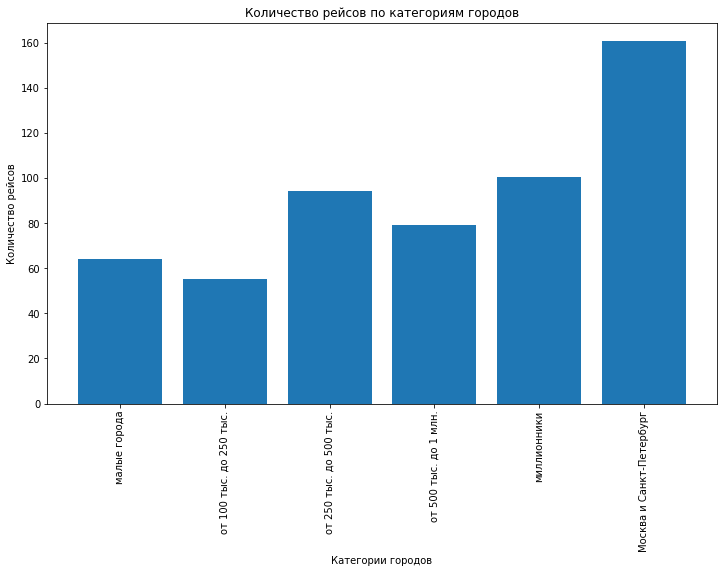

In [26]:
plt.figure(figsize=(12, 7))
plt.bar(
    city_average_flights.groupby('category').sum().index, \
    city_average_flights.groupby('category').sum()['average_flights']
)
ax = plt.gca()
ax.set_xlabel('Категории городов')
ax.set_ylabel('Количество рейсов')
ax.set_xticklabels(city_average_flights.groupby('category').sum().index, rotation = 90, verticalalignment = 'top')
plt.title('Количество рейсов по категориям городов');

**Вывод:** количество рейсов не всегда зависит величины города. Количество рейсов в малые города выше, чем в города с населением от 100 тыс. до 250 тыс., а количество рейсов в города с населением от 250 тыс. до 500 тыс. выше, чем от 500 тыс. до 1 млн., и сравнимо с миллионниками.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здорово, что ты посмотрел на данные в таком разрезе. Это правда здорово. Старайся обосновывать получаемый результат. 

</div>

## Построим графики топ-10 городов и количество рейсов

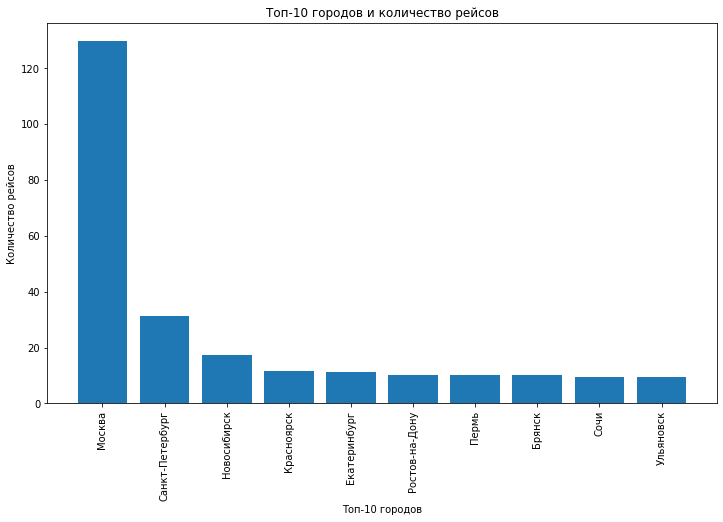

In [27]:
plt.figure(figsize=(12, 7))
plt.bar(city_average_flights.sort_values(by='average_flights', ascending=False)['city'].head(10), \
        city_average_flights.sort_values(by='average_flights', ascending=False)['average_flights'].head(10))
ax = plt.gca()
ax.set_xlabel('Топ-10 городов')
ax.set_ylabel('Количество рейсов')
ax.set_xticklabels(city_average_flights.sort_values(by='average_flights', ascending=False)['city'].head(10), \
                   rotation = 90, verticalalignment = 'top')
plt.title('Топ-10 городов и количество рейсов');

Для тех же данных построим круговую диаграмму.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Опять же более детально подумай над тем, почему мы получаем такой результат. Почему, например, Новосибирск занимает третью строчку?

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

Потому что Новосибирск — крупнейший транспортно-логистический кластер Сибири.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Соглашусь, это удобный транспортный узел достаточно большой территории РФ.  

</div>

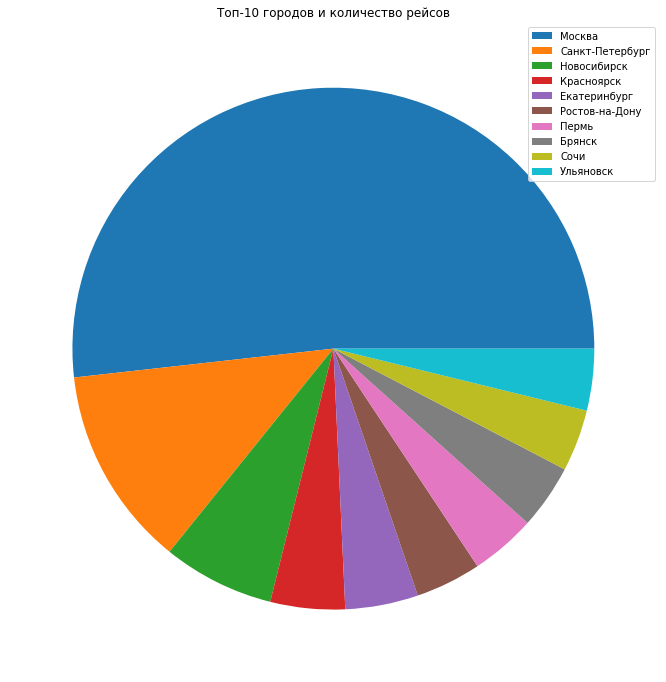

In [28]:
plt.figure(figsize=(12, 12))
plt.pie(city_average_flights.sort_values(by='average_flights', ascending=False)['average_flights'].head(10))
plt.legend(labels = city_average_flights.sort_values(by='average_flights', ascending=False)['city'].head(10))
plt.title('Топ-10 городов и количество рейсов');

**Вывод**: больше половины воздушного трафика России идёт через Москву.

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>
 
Не советую использовать пироговые диаграммы (pie-charts). Такая диаграмма затрудняет понимание, особенно если сегментов будет больше 4х. Также, на этом типе диаграмм сложно визуально увидеть разницу между сегментами. Рекомендую использовать обычные столбчатые диаграммы вместо пироговых диаграмм. 

</div>

<div class="alert alert-info">
<h2> Комментарий студента</h2>

1. В прошлых проектах не доводилось строить круговые диаграммы.
2. Данная диаграмма демонстрирует централизацию воздушного трафика России. Я и раньше слышал, что на долю Москвы и Санкт-Петербурга приходится 70-80% авиатрафика.

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Проект небольшой, однако выводы по проведенному анализу все же стоит сделать. Обязательно сформулируй финальный вывод о проделанной работе. 

</div>

# Общий вывод

Больше всего рейсов ожидаемо в Москве и Петербурге. На третьем месте Новосибирск — крупнейший транспортно-логистический кластер Сибири.

Самыми популярными моделями внутренних авиаперевозок являются региональные самолёты Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100. Суммарное присутствие самолётов крупнейших авиакомпаний Airbus и Boeing значительно меньше.

Количество рейсов не всегда зависит величины города. Количество рейсов в малые города выше, чем в города с населением от 100 тыс. до 250 тыс., а количество рейсов в города с населением от 250 тыс. до 500 тыс. выше, чем от 500 тыс. до 1 млн., и сравнимо с миллионниками.

Воздушный трафик России очень централизован. На долю Москвы и Санкт-Петербурга приходится 70-80% авиатрафика.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, верно. Старайся и в выводах вводить аналитические суждения. За счет чего, например, трафик так централизирован?

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Повторюсь, основная работа тобой уже проделана в тренажере. Молодец, что ты его прошел. Работы в плане кода тут у нас было немного, поэтому давай поработаем над формулировкой выводов, а также оформлением проекта.  Радует, что ты стараешься рассмотреть данные под разными углами. Это важный навык. 
    
Как исправишь помарки, присылай работу снова :)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Все помарки исправлены, работа выполнена хорошо. Работа по данному спринту проделана большая. Однако дальше тебя ждет один из самых сложных проектов. Пожалуйста, проходи тренажер внимательно. Успехов в дальнейших проектах :)

</div>